        **__________________ Balloons Image Segmentation On pre trained Model of MASK RCNN __________________**



#### Import Required Dependencies

In [58]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage.io

#### Local Root directory 

In [59]:
# Root directory of the project
ROOT_DIR = os.path.abspath("../")

In [60]:
ROOT_DIR

'C:\\Users\\Madina Computers\\Documents\\our_mask_rcnn'

#### Import the files and methods of MRCNN

In [61]:
# Import Mask RCNN 
sys.path.append(ROOT_DIR)  # To find local version of the library
#import neccessory Dependencies for Mask RCNN
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
from mrcnn.config import Config
from project.balloons import balloons


#### weight of pre trained model

In [62]:
# weight path of pre trained model
BALLON_WEIGHTS_PATH = r"C:\Users\Madina Computers\Documents\our_mask_rcnn\mask_rcnn_balloon.h5" 

In [63]:
#to avoid from path error
BALLON_WEIGHTS_PATH = BALLON_WEIGHTS_PATH.strip("‪u202a")

#### Training and validation Dataset

In [64]:
BALLOON_DIR = r"C:\Users\Madina Computers\Documents\our_mask_rcnn\dataset"

In [65]:
BALLOON_DIR = BALLOON_DIR.strip("‪u202a")

In [66]:
#join both parts
BALLOON_DIR = os.path.join(ROOT_DIR, BALLOON_DIR)

In [67]:
BALLOON_DIR

'C:\\Users\\Madina Computers\\Documents\\our_mask_rcnn\\dataset'

#### Configuration the Hyperperameters

In [68]:
config = balloons.BalloonConfig()
class InferenceConfig(config.__class__):
    #set GPU_COUNT=1 if we have cpu
    GPU_COUNT = 1
    

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.5
DETECTION_NMS_THRESHOLD        0.1
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

#### Load Train and Validation Dataset

In [16]:
# Load dataset
dataset = balloons.BalloonDataset()


In [37]:
dataset.load_balloon(BALLOON_DIR, "train")
# for using the dataset any(train,validate)
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 122
Classes: ['BG', 'balloon']


#### Operation or tensor should be placed on the CPU if don't have GPU.

In [39]:
DEVICE = "/cpu:0"
#refers to the use of a trained model
TEST_MODE = "inference"

In [53]:
# %matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

In [54]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

#### Load weights in a model

In [55]:
# Set path to balloon weights file and we load the last model we trained
weights_path = BALLON_WEIGHTS_PATH

# Load weights
print("weights :", weights_path)
model.load_weights(weights_path, by_name=True)

weights : C:\Users\Madina Computers\Documents\our_mask_rcnn\mask_rcnn_balloon.h5


#### Function to plot data

In [56]:
#get axis of object
def get_ax(rows=1, cols=1, size=16):
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

#### Prediction over train Dataset

image ID: balloon.4543126482_92254ef046_b.jpg (95) C:\Users\Madina Computers\Documents\our_mask_rcnn\dataset\train\4543126482_92254ef046_b.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (11,)                 min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (11, 4)               min:  172.00000  max:  778.00000  int32
gt_mask                  shape: (1024, 1024, 11)      min:    0.00000  max:    1.00000  bool


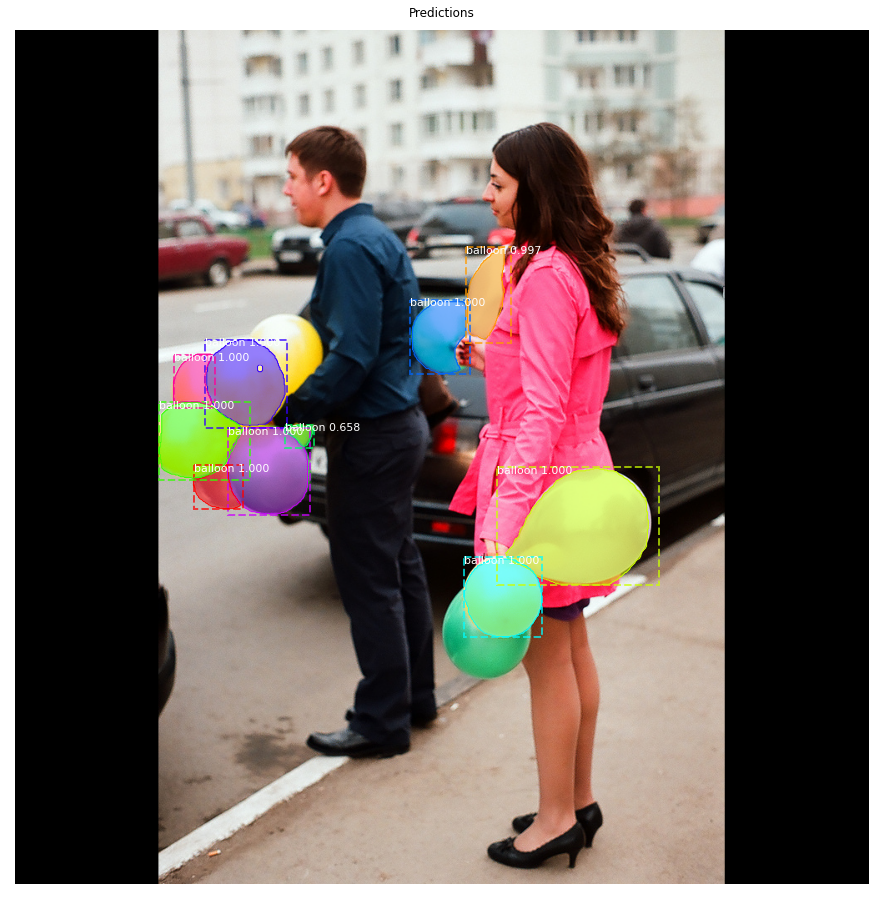

In [86]:
#get the random image from the dataset and also extract the pre definded feature provide by MRCNN
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run the model on input image set verbose=1 print information about the detection process to the console.
results = model.detect([image], verbose=1)

# Matplotlib plot axis object
ax = get_ax(1)
#results(bounding boxes, masks, class IDs, and scores) for the input image in the model
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

### Prediction over test Data

In [48]:
IMAGE_DIR = os.path.join(ROOT_DIR, "test")

In [49]:
class_names = ['BG','balloon']

Processing 1 images
image                    shape: (550, 800, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


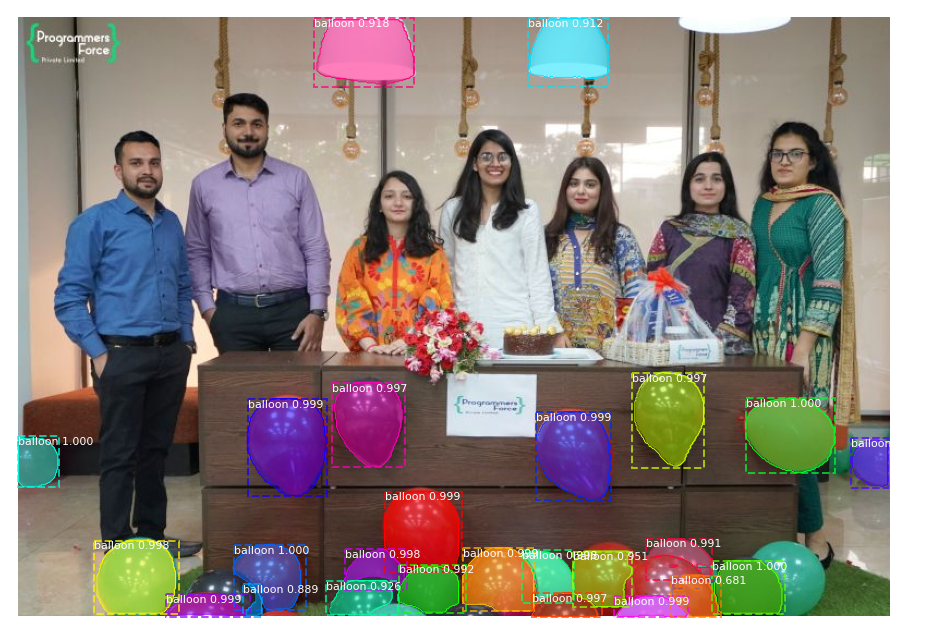

In [50]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
# Run detection
results = model.detect([image], verbose=1)


# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])


###### Hence its working very well over test Data